In [2]:
library(tidyverse)
library(ggvenn)

In [3]:
### Venn diagram list -----
Total <- read.csv("Total/original/Total_Maya2_root.csv")
colnames(Total)
WT_UP <- Total %>%
  dplyr::filter(Log2FC_WT > 1, Padj_WT < 0.1)
fls2_UP <- Total %>%
  dplyr::filter(Log2FC_fls2 > 1, Padj_fls2 < 0.1)
WT_UP_only <- WT_UP %>%
  dplyr::filter(!(Gene %in% fls2_UP$Gene))

WT_DOWN <- Total %>%
  dplyr::filter(Log2FC_WT < -1, Padj_WT < 0.1)
fls2_DOWN <- Total %>%
  dplyr::filter(Log2FC_fls2 < -1, Padj_fls2 < 0.1)
WT_DOWN_only <- WT_DOWN %>%
  dplyr::filter(!(Gene %in% fls2_DOWN$Gene))

FLG22 <- read.csv("Total/original/Total_Maya2_root_with_flg22.csv", sep=",")
FLG22_UP <- FLG22 %>%
  dplyr::filter(Log2FC_flg22 > 1, Padj_flg22 < 0.1)

FLG22_DOWN <- FLG22 %>%
  dplyr::filter(Log2FC_flg22 < -1, Padj_flg22 < 0.1)

Total$Log2FC_flg22 <- FLG22$Log2FC_flg22
Total$Padj_flg22 <- FLG22$Padj_flg22

Total <- Total %>%
  dplyr::select(Gene, Gene_Symbol, Gene_Name, 
                Log2FC_WT, Padj_WT, Log2FC_fls2, Padj_fls2, Log2FC_flg22, Padj_flg22, GO)


[1] "X"                  "Gene"               "Gene_Symbol"       
 [4] "Gene_Name"          "Log2FC_WT"          "Padj_WT"           
 [7] "Log2FC_fls2"        "Padj_fls2"          "WT_0h_Maya2_rep1"  
[10] "WT_0h_Maya2_rep2"   "WT_0h_Maya2_rep3"   "WT_1h_Maya2_rep1"  
[13] "WT_1h_Maya2_rep2"   "WT_1h_Maya2_rep3"   "fls2_0h_Maya2_rep1"
[16] "fls2_0h_Maya2_rep2" "fls2_0h_Maya2_rep3" "fls2_1h_Maya2_rep1"
[19] "fls2_1h_Maya2_rep2" "fls2_1h_Maya2_rep3" "GO"

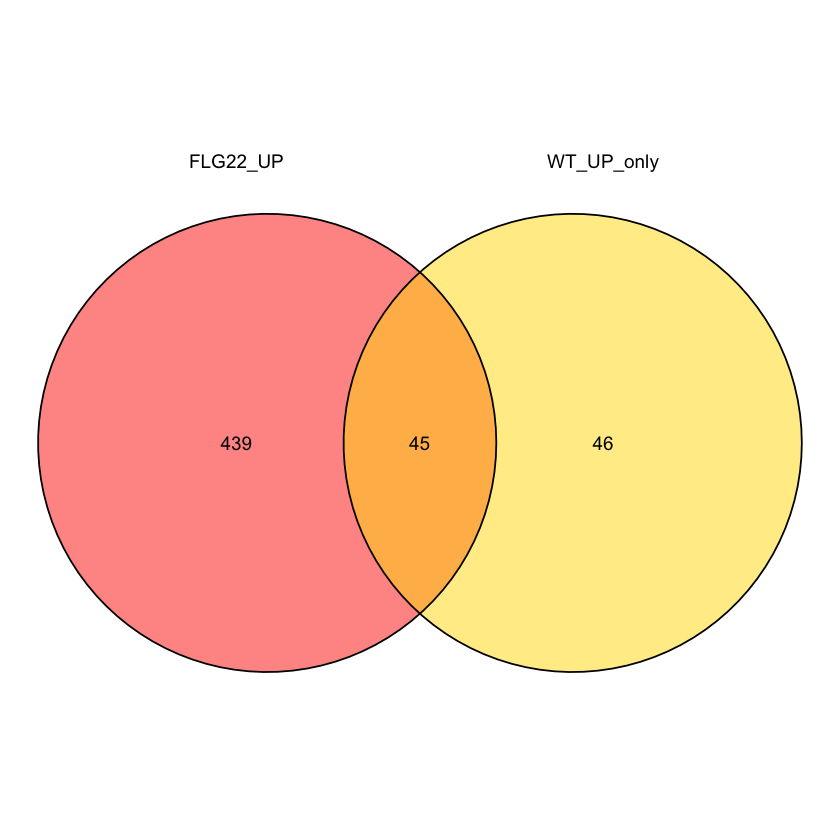

In [4]:
### Drawing the Venn diagram -----
vennlistUp <- list( "WT_UP_only" = WT_UP_only$Gene,
                    "WT_DOWN_only" = WT_DOWN_only$Gene,
                    "FLG22_UP" = FLG22_UP$Gene,
                    "FLG22_DOWN" = FLG22_DOWN$Gene
)
vennlistUp <- lapply(vennlistUp, function(x) x[!is.na(x)])

ggvenn(vennlistUp, c("FLG22_UP", "WT_UP_only"),
       fill_color = c("#ff2800", "#ffda00", "#ffae42"),
       stroke_size = 0.5, set_name_size = 4, show_percentage = FALSE)

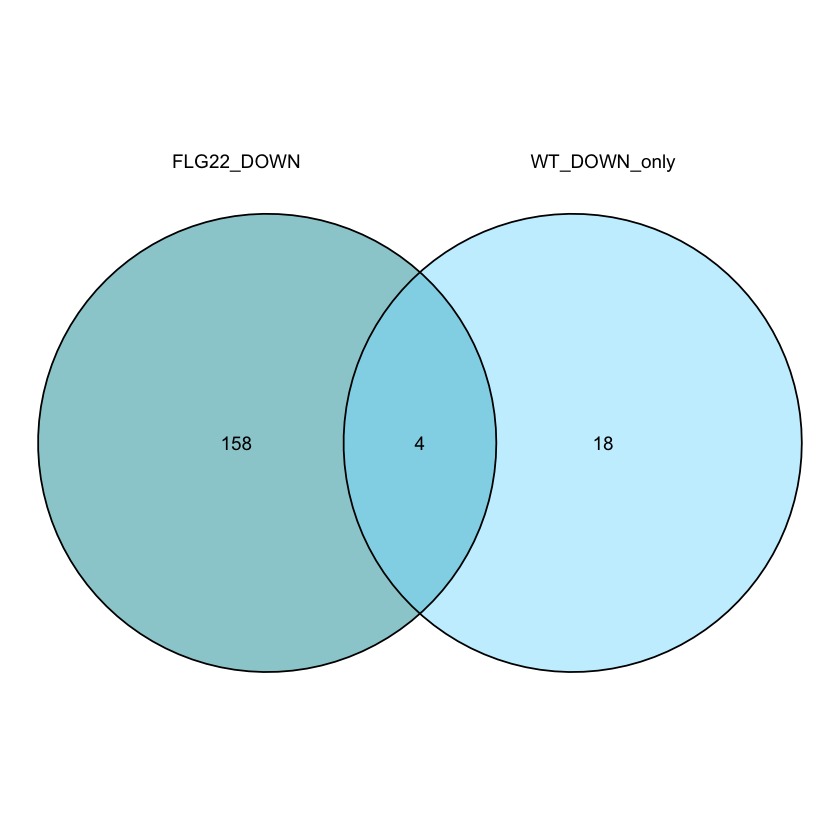

In [5]:

ggvenn(vennlistUp, c("FLG22_DOWN", "WT_DOWN_only"),
       fill_color = c("#0d9ba3", "#8ae0fe", "#4eabae"),
       stroke_size = 0.5, set_name_size = 4, show_percentage = FALSE)

In [7]:
### Vene diagram related gene list -----
# UP gene list up
Both_UP_list <- intersect(vennlistUp$FLG22_UP, vennlistUp$WT_UP_only)
Maya1_UP_only_list <- setdiff(vennlistUp$WT_UP_only, vennlistUp$FLG22_UP)
FLG22_UP_only_list <- setdiff(vennlistUp$FLG22_UP, vennlistUp$WT_UP_only)
# DOWN gene list up
Both_DOWN_list <- intersect(vennlistUp$WT_DOWN_only, vennlistUp$FLG22_DOWN)
Maya1_DOWN_only_list <- setdiff(vennlistUp$WT_DOWN_only, vennlistUp$FLG22_DOWN)
FLG22_DOWN_only_list <- setdiff(vennlistUp$FLG22_DOWN, vennlistUp$WT_DOWN_only)

#filter by list
Both_UP <- Total %>%
  dplyr::filter(Gene %in% Both_UP_list)
nrow(Both_UP)
Maya1_UP_only <- Total %>%
  dplyr::filter(Gene %in% Maya1_UP_only_list)
nrow(Maya1_UP_only)
FLG22_UP_only <- Total %>%
  dplyr::filter(Gene %in% FLG22_UP_only_list)
nrow(FLG22_UP_only)

Both_DOWN <- Total %>%
  dplyr::filter(Gene %in% Both_DOWN_list)
nrow(Both_DOWN)
Maya1_DOWN_only <- Total %>%
  dplyr::filter(Gene %in% Maya1_DOWN_only_list)
nrow(Maya1_DOWN_only)
FLG22_DOWN_only <- Total %>%
  dplyr::filter(Gene %in% FLG22_DOWN_only_list)
nrow(FLG22_DOWN_only)

write.csv(Both_UP,"Venn/original/Both_UP.csv")
write.csv(Maya1_UP_only,"Venn/original/Maya1_UP_only.csv")
write.csv(FLG22_UP_only,"Venn/original/FLG22_UP_only.csv")
write.csv(Both_DOWN,"Venn/original/Both_DOWN.csv")
write.csv(Maya1_DOWN_only,"Venn/original/Maya1_DOWN_only.csv")
write.csv(FLG22_DOWN_only,"Venn/original/FLG22_DOWN_only .csv")

[1] 45

[1] 46

[1] 439

[1] 4

[1] 18

[1] 158